In [3]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

In [5]:
fake_data=pd.read_csv('Fake.csv')
true_data=pd.read_csv('True.csv')

In [6]:
fake_data['label'] = 0
true_data['label'] = 1

In [7]:
fake_data.head(5)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
true_data.head(5)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
news_data=pd.concat([fake_data,true_data],ignore_index=True)

In [10]:
news_data.drop_duplicates(subset=['text','title'], inplace=True)

In [11]:
print(news_data)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
44893  'Fully committed' NATO backs new U.S. approach...   
44894  LexisNexis withdrew two products from Chinese ...   
44895  Minsk cultural hub becomes haven from authorities   
44896  Vatican upbeat on possibility of Pope Francis ...   
44897  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       New

In [12]:
news_data.isnull().sum()


title      0
text       0
subject    0
date       0
label      0
dtype: int64

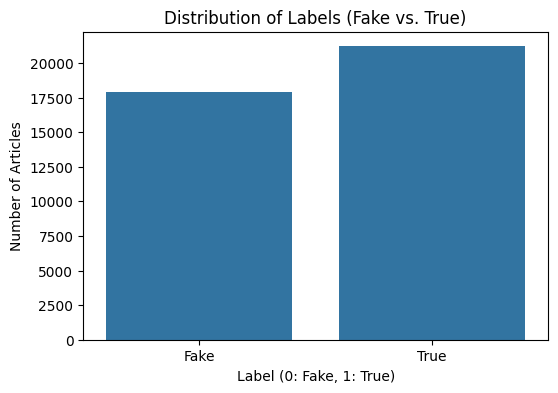

In [13]:

label_counts = news_data['label'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Labels (Fake vs. True)')
plt.xlabel('Label (0: Fake, 1: True)')
plt.ylabel('Number of Articles')
plt.xticks(ticks=[0, 1], labels=['Fake', 'True'])
plt.show()

In [14]:
original_data=news_data.copy()

In [15]:
news_data = news_data.drop(['date', 'subject'], axis=1)

In [16]:
news_data

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SANHITH
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
news_data['content']=news_data['title']+' '+news_data['text']

In [19]:
x=news_data.drop(columns='label',axis=1)
y=news_data['label']


In [20]:
"""def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    return ' '.join(stemmed_content)"""

"def stemming(content):\n    stemmed_content = re.sub('[^a-zA-Z]',' ',content)\n    stemmed_content = stemmed_content.lower()\n    stemmed_content = stemmed_content.split()\n    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]\n    return ' '.join(stemmed_content)"

In [21]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\SANHITH
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\SANHITH
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:


lemmatizer = WordNetLemmatizer()

def lemmatizing(content):
    lemmatized_content = re.sub('[^a-zA-Z]',' ',content)
    lemmatized_content = lemmatized_content.lower()
    lemmatized_content = lemmatized_content.split()
    lemmatized_content = [lemmatizer.lemmatize(word) for word in lemmatized_content if not word in stopwords.words('english')]
    lemmatized_content = ' '.join(lemmatized_content)
    return lemmatized_content

In [23]:
news_data['content'] = news_data['content'].apply(lemmatizing)

In [33]:
vectorizer = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1, 2),
    stop_words='english',
    max_df=0.8,
    min_df=5
)
x_vectorized = vectorizer.fit_transform(news_data['content'])



In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_vectorized, y, test_size=0.2, random_state=42)


In [26]:
print("Shape of x_vectorized:", x_vectorized.shape)
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_vectorized: (39105, 1000)
Shape of x_train: (31284, 1000)
Shape of x_test: (7821, 1000)
Shape of y_train: (31284,)
Shape of y_test: (7821,)


In [27]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [38]:
X_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9879810765886715


In [39]:
X_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9873417721518988


In [40]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, pos_label='FAKE'))
    print("Recall:", recall_score(y_test, y_pred, pos_label='FAKE'))
    print("F1 Score:", f1_score(y_test, y_pred, pos_label='FAKE'))

In [35]:
def plot_conf_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


In [36]:
# 6. Save the model & vectorizer
with open("fake_news_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!
